# Lending Club Case Study

## Initial Steps

In [34]:
# Initialize library which to be used for analysis
import pandas as pd
import numpy as np

In [35]:
# Reading coma separted file usingn pandas library
raw_loan_data = pd.read_csv("loan.csv")
raw_loan_data.shape

C:\Users\priya\AppData\Local\Temp\ipykernel_15228\3640188012.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_loan_data = pd.read_csv("loan.csv")


(39717, 111)

##### 1) Check if any duplicate 'id' is present
- Ideally 'id' should be unique number for each row entry, hence below step is performed to check if we any duplicate 'id' is available

In [36]:
raw_loan_data[raw_loan_data['id'].duplicated(keep='first')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


As per above step, we do not found any 'id' is duplicate in record

### Select neccessory columns for analysis

In [37]:
loan_data = raw_loan_data.loc[:, ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'int_rate', 'installment', 'loan_status', 'grade', 'sub_grade', 'dti', 'verification_status', 'term', 'home_ownership', 'purpose']]
loan_data.shape

(39717, 15)

In [38]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other
4,1075358,3000,3000,3000.0,80000.0,12.69%,67.79,Current,B,B5,17.94,Source Verified,60 months,RENT,other


### Filter Data
- Check if any column have null value
- Correct Datatype / Units

In [39]:
loan_data.iloc[:, 0:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   funded_amnt          39717 non-null  int64  
 3   funded_amnt_inv      39717 non-null  float64
 4   annual_inc           39717 non-null  float64
 5   int_rate             39717 non-null  object 
 6   installment          39717 non-null  float64
 7   loan_status          39717 non-null  object 
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  dti                  39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  term                 39717 non-null  object 
 13  home_ownership       39717 non-null  object 
 14  purpose              39717 non-null  object 
dtypes: float64(4), int64(3), object(8)
m

In [40]:
loan_data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,installment,dti
count,3.971700e+04,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,6.896893e+04,324.561922,13.315130
std,2.106941e+05,7456.670694,7187.238670,7128.450439,6.379377e+04,208.874874,6.678594
min,5.473400e+04,500.000000,500.000000,0.000000,4.000000e+03,15.690000,0.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,4.040400e+04,167.020000,8.170000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,5.900000e+04,280.220000,13.400000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,8.230000e+04,430.780000,18.600000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,6.000000e+06,1305.190000,29.990000


In [41]:
loan_data.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,installment,dti
id,1.000000,0.141919,0.152286,0.249547,0.008731,0.086587,0.095983
loan_amnt,0.141919,1.000000,0.981578,0.940034,0.271149,0.930288,0.066439
funded_amnt,0.152286,0.981578,1.000000,0.958422,0.266965,0.956159,0.066283
funded_amnt_inv,0.249547,0.940034,0.958422,1.000000,0.254375,0.905039,0.074689
annual_inc,0.008731,0.271149,0.266965,0.254375,1.000000,0.270874,-0.122732
installment,0.086587,0.930288,0.956159,0.905039,0.270874,1.000000,0.054186
dti,0.095983,0.066439,0.066283,0.074689,-0.122732,0.054186,1.000000


### Univariate Analysis

- Find the current

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns #Graph library that use matplot in background

##### 1. Check the count for each member as per their target variable

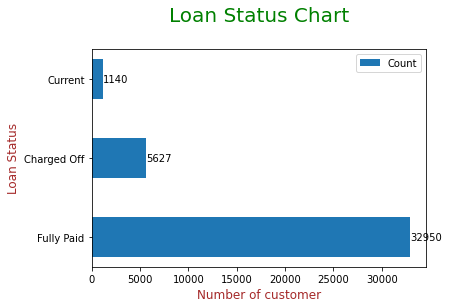

In [10]:
X = loan_data['loan_status'].value_counts().index.values
Y = loan_data['loan_status'].value_counts().values
chart1 = plt.barh(X, Y, label='Count', height=0.5)
#plt.bar(loan_data['loan_status'].value_counts().index.values, loan_data['loan_status'].value_counts().values, label='Number')

# Adding and formatting title
plt.title("Loan Status Chart\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Number of customer", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend()
plt.show()

The member whose loan is "Current" can be not analysed for this study,

Hence we should remove them as a "not required rows"

In [11]:
# Currently running loan status member removed from analysis data
loan_data = loan_data[loan_data["loan_status"] != 'Current']

In [12]:
loan_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other
5,1075269,5000,5000,5000.0,36000.0,7.90%,156.46,Fully Paid,A,A4,11.20,Source Verified,36 months,RENT,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,110000.0,8.07%,78.42,Fully Paid,A,A4,11.33,Not Verified,36 months,MORTGAGE,home_improvement
39713,90665,8500,8500,875.0,18000.0,10.28%,275.38,Fully Paid,C,C1,6.40,Not Verified,36 months,RENT,credit_card
39714,90395,5000,5000,1325.0,100000.0,8.07%,156.84,Fully Paid,A,A4,2.30,Not Verified,36 months,MORTGAGE,debt_consolidation
39715,90376,5000,5000,650.0,200000.0,7.43%,155.38,Fully Paid,A,A2,3.72,Not Verified,36 months,MORTGAGE,other


### Bivariate Analysis

- Loan status vs home ownership
- Loan status vs verification status
- Loan status vs Purpose

###### Graph : 
- dti vs charged off/loan Paid


##### Grouped bar chart
loan_status vs annual income


bins = {1 lakh, }
loan_status = catogorical

In [13]:
loan_data['annual_inc']

0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38577, dtype: float64

Text(0, 0.5, 'Sales')

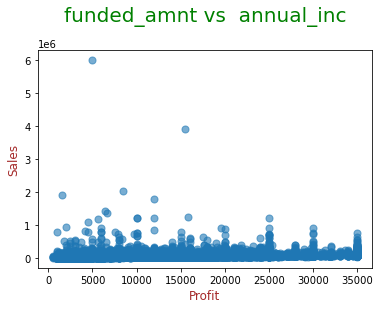

In [15]:
# plotting scatter chart
plt.scatter(loan_data['funded_amnt'], loan_data['annual_inc'],  alpha= 0.6, s = 50 )
#plt.scatter(loan_data['funded_amnt_inv'], loan_data['annual_inc'],  alpha= 0.6, s = 50 )

# Adding and formatting title
plt.title("funded_amnt vs  annual_inc\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Profit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Sales", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

In [16]:
#print(loan_data.groupby(by='loan_status').mean())

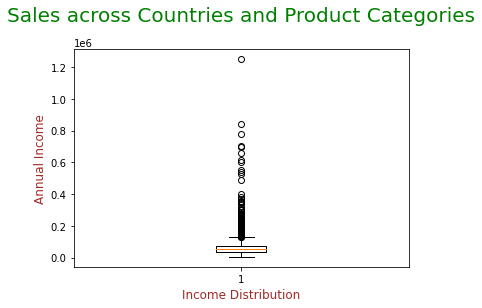

In [54]:
df_good = loan_data[loan_data['loan_status'] == 'Fully Paid']
df_bad = loan_data[loan_data['loan_status'] == 'Charged Off']

plt.boxplot([df_bad['annual_inc']])

# Adding and formatting title
plt.title("Sales across Countries and Product Categories\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Income Distribution", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [ ]:
df_good = loan_data[loan_data['loan_status'] == 'Fully Paid']
df_bad = loan_data[loan_data['loan_status'] == 'Charged Off']

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

loan_status = loan_data['loan_status']
income = loan_data['annual_inc']
funded_amnt_inv = loan_data['funded_amnt_inv']

ax[0].bar(loan_status, income, label='1')
ax[0].bar(loan_status, funded_amnt_inv, label='2')

ax[1].scatter(loan_data['funded_amnt'], loan_data['annual_inc'],  alpha= 0.6, s = 50 )
plt.show()


In [ ]:
pd.pivot_table(loan_data, index=['loan_status', 'annual_inc'], values=['dti'])